In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

f1_scores = {
  "ConvNext": {
    "Original": 0.8137,
    "Gaussian Noise L1": 0.7368,
    "Gaussian Noise L2": 0.7160,
    "Gaussian Noise L3": 0.6583,
    "Defocus Blur L1": 0.6877,
    "Defocus Blur L2": 0.6335,
    "Defocus Blur L3": 0.4997,
    "Pixelate L1": 0.7200,
    "Pixelate L2": 0.6722,
    "Pixelate L3": 0.6173
  },
  "CVT": {
    "Original": 0.7644,
    "Gaussian Noise L1": 0.4771,
    "Gaussian Noise L2": 0.3370,
    "Gaussian Noise L3": 0.1829,
    "Defocus Blur L1": 0.3860,
    "Defocus Blur L2": 0.2773,
    "Defocus Blur L3": 0.1375,
    "Pixelate L1": 0.5172,
    "Pixelate L2": 0.4598,
    "Pixelate L3": 0.2897
  },
  "Swin": {
    "Original": 0.8338,
    "Gaussian Noise L1": 0.7011,
    "Gaussian Noise L2": 0.6395,
    "Gaussian Noise L3": 0.5506,
    "Defocus Blur L1": 0.6601,
    "Defocus Blur L2": 0.5743,
    "Defocus Blur L3": 0.4156,
    "Pixelate L1": 0.7541,
    "Pixelate L2": 0.7295,
    "Pixelate L3": 0.6725
  },
  "SegFormer": {
    "Original": 0.6504,
    "Gaussian Noise L1": 0.3623,
    "Gaussian Noise L2": 0.2556,
    "Gaussian Noise L3": 0.1240,
    "Defocus Blur L1": 0.1628,
    "Defocus Blur L2": 0.0839,
    "Defocus Blur L3": 0.0264,
    "Pixelate L1": 0.2885,
    "Pixelate L2": 0.2039,
    "Pixelate L3": 0.1013
  },
  "ResNet": {
    "Original": 0.7475,
    "Gaussian Noise L1": 0.5868,
    "Gaussian Noise L2": 0.4786,
    "Gaussian Noise L3": 0.3084,
    "Defocus Blur L1": 0.5845,
    "Defocus Blur L2": 0.5071,
    "Defocus Blur L3": 0.3668,
    "Pixelate L1": 0.6320,
    "Pixelate L2": 0.6320,
    "Pixelate L3": 0.4610
  },
  "ViT": {
    "Original": 0.7427,
    "Gaussian Noise L1": 0.7065,
    "Gaussian Noise L2": 0.6410,
    "Gaussian Noise L3": 0.4980,
    "Defocus Blur L1": 0.6594,
    "Defocus Blur L2": 0.6128,
    "Defocus Blur L3": 0.5075,
    "Pixelate L1": 0.7405,
    "Pixelate L2": 0.7383,
    "Pixelate L3": 0.6987
  }
}


runtimes = {
  "ConvNext": 5.7,
  "ViT": 13.3,
  "CVT": 15.9,
  "Swin": 32.3,
  "SegFormer": 13.6,
  "ResNet": 10.3
}

XAI_ave_runtimes = {
  "ConvNext": 41.19,
  "ViT": 72.5,
  "CVT": 67.76,
  "Swin": 137.24,
  "SegFormer": 65.08,
  "ResNet": 35.34
}
# Benchmark F1 score and the maximum F1 score from the provided data

max_f1 = max(max(model.values()) for model in f1_scores.values())  # This is obtained from the previous cell

xairs=       {
        "VIT": {
            "Original": {
                "GradCAM": "0.402",
                "HiResCAM": "0.975",
                "GradCAM++": "0.608",
                "XgradCAM": "0.723",
                "LayerCAM": "0.955"
            },
            "GaussianNoise": {
                "GradCAM": "0.548",
                "HiResCAM": "0.983",
                "GradCAM++": "0.712",
                "XgradCAM": "0.830",
                "LayerCAM": "0.972"
            },
            "DefocusBlur": {
                "GradCAM": "0.762",
                "HiResCAM": "0.981",
                "GradCAM++": "0.829",
                "XgradCAM": "0.904",
                "LayerCAM": "0.972"
            },
            "Pixelate": {
                "GradCAM": "0.582",
                "HiResCAM": "0.985",
                "GradCAM++": "0.732",
                "XgradCAM": "0.827",
                "LayerCAM": "0.971"
            }
        },
        "ConvNext": {
            "Original": {
                "GradCAM": "0.765",
                "HiResCAM": "0.765",
                "GradCAM++": "0.667",
                "XgradCAM": "0.765",
                "LayerCAM": "0.715"
            },
            "GaussianNoise": {
                "GradCAM": "0.832",
                "HiResCAM": "0.832",
                "GradCAM++": "0.793",
                "XgradCAM": "0.832",
                "LayerCAM": "0.802"
            },
            "DefocusBlur": {
                "GradCAM": "0.904",
                "HiResCAM": "0.904",
                "GradCAM++": "0.859",
                "XgradCAM": "0.904",
                "LayerCAM": "0.871"
            },
            "Pixelate": {
                "GradCAM": "0.846",
                "HiResCAM": "0.846",
                "GradCAM++": "0.799",
                "XgradCAM": "0.846",
                "LayerCAM": "0.814"
            }
        },
        "CVT": {
            "Original": {
                "GradCAM": "0.798",
                "HiResCAM": "0.930",
                "GradCAM++": "0.348",
                "XgradCAM": "0.624",
                "LayerCAM": "0.749"
            },
            "GaussianNoise": {
                "GradCAM": "0.938",
                "HiResCAM": "0.940",
                "GradCAM++": "0.778",
                "XgradCAM": "0.891",
                "LayerCAM": "0.944"
            },
            "DefocusBlur": {
                "GradCAM": "0.944",
                "HiResCAM": "0.828",
                "GradCAM++": "0.769",
                "XgradCAM": "0.795",
                "LayerCAM": "0.858"
            },
            "Pixelate": {
                "GradCAM": "0.918",
                "HiResCAM": "0.918",
                "GradCAM++": "0.735",
                "XgradCAM": "0.847",
                "LayerCAM": "0.904"
            }
        },
        "ResNet": {
            "Original": {
                "GradCAM": "0.530",
                "HiResCAM": "0.536",
                "GradCAM++": "0.542",
                "XgradCAM": "0.631",
                "LayerCAM": "0.521"
            },
            "GaussianNoise": {
                "GradCAM": "0.697",
                "HiResCAM": "0.702",
                "GradCAM++": "0.696",
                "XgradCAM": "0.776",
                "LayerCAM": "0.665"
            },
            "DefocusBlur": {
                "GradCAM": "0.565",
                "HiResCAM": "0.571",
                "GradCAM++": "0.607",
                "XgradCAM": "0.617",
                "LayerCAM": "0.540"
            },
            "Pixelate": {
                "GradCAM": "0.639",
                "HiResCAM": "0.645",
                "GradCAM++": "0.655",
                "XgradCAM": "0.739",
                "LayerCAM": "0.622"
            }
        },
        "Swin": {
            "Original": {
                "GradCAM": "0.230",
                "HiResCAM": "0.230",
                "GradCAM++": "0.243",
                "XgradCAM": "0.230",
                "LayerCAM": "0.253"
            },
            "GaussianNoise": {
                "GradCAM": "0.594",
                "HiResCAM": "0.594",
                "GradCAM++": "0.624",
                "XgradCAM": "0.594",
                "LayerCAM": "0.663"
            },
            "DefocusBlur": {
                "GradCAM": "0.806",
                "HiResCAM": "0.806",
                "GradCAM++": "0.816",
                "XgradCAM": "0.806",
                "LayerCAM": "0.819"
            },
            "Pixelate": {
                "GradCAM": "0.576",
                "HiResCAM": "0.576",
                "GradCAM++": "0.618",
                "XgradCAM": "0.577",
                "LayerCAM": "0.631"
            }
        },
        "SegFormer": {
            "Original": {
                "GradCAM": "0.332",
                "HiResCAM": "0.332",
                "GradCAM++": "0.411",
                "XgradCAM": "0.322",
                "LayerCAM": "0.423"
            },
            "GaussianNoise": {
                "GradCAM": "0.332",
                "HiResCAM": "0.332",
                "GradCAM++": "0.446",
                "XgradCAM": "0.332",
                "LayerCAM": "0.463"
            },
            "DefocusBlur": {
                "GradCAM": "0.224",
                "HiResCAM": "0.224",
                "GradCAM++": "0.287",
                "XgradCAM": "0.224",
                "LayerCAM": "0.315"
            },
            "Pixelate": {
                "GradCAM": "0.344",
                "HiResCAM": "0.344",
                "GradCAM++": "0.442",
                "XgradCAM": "0.344",
                "LayerCAM": "0.463"
            }
        }
    }

data_f1 = {}

# Loop through each model in f1_scores
for model in f1_scores:
    # Create an empty dictionary to store the data for this model
    model_data = {}
    
    # Loop through each condition for this model
    for condition in f1_scores[model]:
        # Add the value for this condition to the model_data dictionary
        model_data[condition] = f1_scores[model][condition]
    
    # Add the model_data dictionary to the data dictionary under the model name
    data_f1[model] = model_data

# Convert the data dictionary to a pandas DataFrame
df_f1 = pd.DataFrame(data_f1)




# Create an empty dictionary to store the extracted data
data_rs = {}

# Loop through each model in xairs
for model in xairs:
    # Create an empty dictionary to store the data for this model
    model_data = {}
    
    # Loop through each condition for this model
    for condition in xairs[model]:
        # Loop through each metric for this condition
        for metric in xairs[model][condition]:
            # Create a key for this metric in the model_data dictionary
            key = f"{condition}_{metric}"
            
            # Add the value for this metric to the model_data dictionary
            value = float(xairs[model][condition][metric])
            model_data[key] = value
    
    # Add the model_data dictionary to the data dictionary
    data_rs[model] = model_data

# Convert the data dictionary to a pandas DataFrame
df_rs = pd.DataFrame(data_rs)



In [3]:
import pandas as pd

# Given runtime dictionaries
runtimes = {
    "ConvNext": 5.7,
    "ViT": 13.3,
    "CVT": 15.9,
    "Swin": 32.3,
    "SegFormer": 13.6,
    "ResNet": 10.3
}

XAI_ave_runtimes = {
    "ConvNext": 41.19,
    "ViT": 72.5,
    "CVT": 67.76,
    "Swin": 137.24,
    "SegFormer": 65.08,
    "ResNet": 35.34
}

# Convert the dictionaries to pandas DataFrames and then transpose them
df_runtimes = pd.DataFrame(runtimes.items(), columns=['Model', 'Runtime']).set_index('Model').T
df_xai_ave_runtimes = pd.DataFrame(XAI_ave_runtimes.items(), columns=['Model', 'XAI_Average_Runtime']).set_index('Model').T

# Merge the two DataFrames on the index
df_t = pd.concat([df_runtimes, df_xai_ave_runtimes], axis=0)

# Display the DataFrame



In [4]:
# Display the DataFrame
print(df_f1)
print(df_rs)
print(df_t)

                   ConvNext     CVT    Swin  SegFormer  ResNet     ViT
Original             0.8137  0.7644  0.8338     0.6504  0.7475  0.7427
Gaussian Noise L1    0.7368  0.4771  0.7011     0.3623  0.5868  0.7065
Gaussian Noise L2    0.7160  0.3370  0.6395     0.2556  0.4786  0.6410
Gaussian Noise L3    0.6583  0.1829  0.5506     0.1240  0.3084  0.4980
Defocus Blur L1      0.6877  0.3860  0.6601     0.1628  0.5845  0.6594
Defocus Blur L2      0.6335  0.2773  0.5743     0.0839  0.5071  0.6128
Defocus Blur L3      0.4997  0.1375  0.4156     0.0264  0.3668  0.5075
Pixelate L1          0.7200  0.5172  0.7541     0.2885  0.6320  0.7405
Pixelate L2          0.6722  0.4598  0.7295     0.2039  0.6320  0.7383
Pixelate L3          0.6173  0.2897  0.6725     0.1013  0.4610  0.6987
                           VIT  ConvNext    CVT  ResNet   Swin  SegFormer
Original_GradCAM         0.402     0.765  0.798   0.530  0.230      0.332
Original_HiResCAM        0.975     0.765  0.930   0.536  0.230      0.3

In [5]:
w1 = 0.25
w2 = 0.25
w3 = 0.25
w4 = 0.25

P= df_f1.loc["Original", "Swin"]
print(P)

C=df_rs.loc["Original_GradCAM", "Swin"]
print(C)

R= df_rs.loc["GaussianNoise_GradCAM", "Swin"]
print(R)

T= df_t.loc["Runtime", "Swin"] + df_t.loc["XAI_Average_Runtime", "Swin"]
max_runtime = df_t.loc['Runtime'].max()
max_xai_average_runtime = df_t.loc['XAI_Average_Runtime'].max()
T_max = max_runtime + max_xai_average_runtime
print(T)

S = w1 * P + w2 * (1 - C) + w3 * (1 - R) + w4 * (1 - (T / T_max))
S_rounded = round(S, 4)
# Output the score
print(f"The calculated score S is: {S_rounded}")

0.8338
0.23
0.594
169.54000000000002
The calculated score S is: 0.5025


In [6]:
def calculate_score(P, C, R, T, T_max, w1, w2, w3, w4):
    return w1 * P + w2 * (1 - C) + w3 * (1 - R) + w4 * (1 - (T / T_max))

original_score = calculate_score(P, C, R, T, T_max, w1, w2, w3, w4)
original_score.round(4)

0.5025

In [7]:
# Lists to store the variations
P_variations = df_f1.loc[:, "Swin"]
# C_variations = df_rs.loc[1:5, "Swin"]
# R_variations = df_rs.loc["6:", "Swin"]
# T_variations = df_t.loc["Runtime", "Swin"] + df_t.loc["XAI_Average_Runtime", "Swin"]

# Calculate score variations
# scores = []
# for i in range(len(P_variations)):
#     score = calculate_score(P_variations[i], C_variations[i], R, T_variations, T_max, w1, w2, w3, w4)
#     scores.append(score)



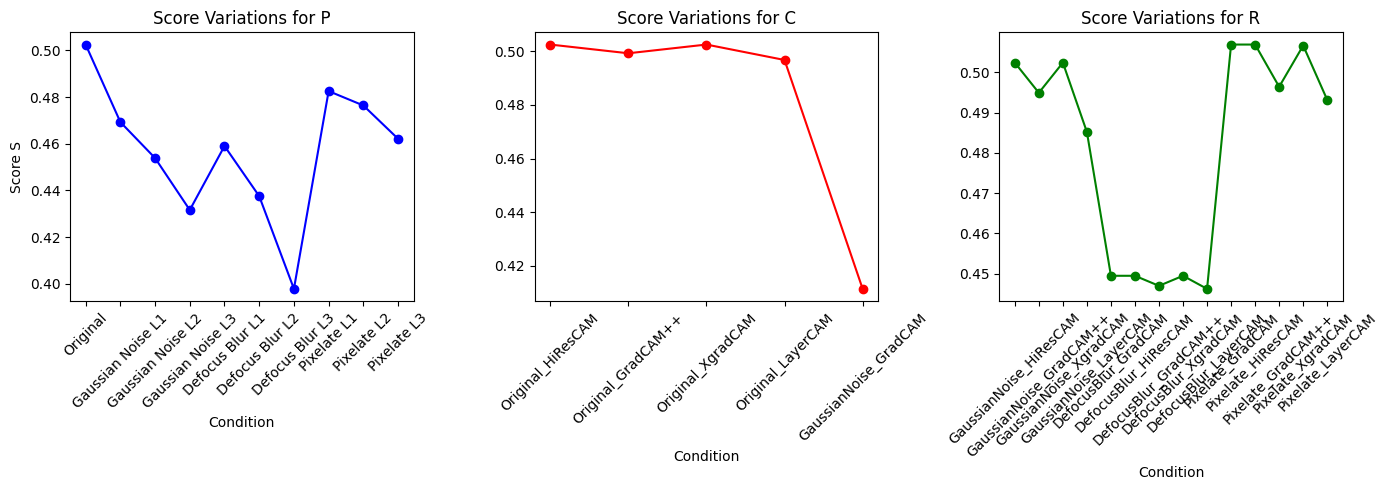

In [8]:
# Correction on slicing based on the given indices
C_variations = df_rs.iloc[1:6, df_rs.columns.get_loc("Swin")]  # Corrected slicing for C_variations
R_variations = df_rs.iloc[6:, df_rs.columns.get_loc("Swin")]   # Corrected slicing for R_variations

# Since the length of R_variations will be different from P_variations and C_variations,
# we will use the first value of R_variations for all calculations to match the example provided
R_fixed = R_variations.iloc[0]

# Recalculate scores with the corrected slices
scores_P = []
scores_C = []
scores_R = []

# Calculate score variations for P
for P_value in P_variations:
    score = calculate_score(P_value, C, R_fixed, T, T_max, w1, w2, w3, w4)
    scores_P.append(score)

# Calculate score variations for C
for C_value in C_variations:
    score = calculate_score(P, C_value, R_fixed, T, T_max, w1, w2, w3, w4)
    scores_C.append(score)

# Calculate score variations for R
for R_value in R_variations:
    score = calculate_score(P, C, R_value, T, T_max, w1, w2, w3, w4)
    scores_R.append(score)

# Plot the variations in score for P, C, and R
plt.figure(figsize=(14, 5))

# Plot for P variations
plt.subplot(1, 3, 1)
plt.plot(df_f1.index, scores_P, marker='o', linestyle='-', color='blue')
plt.title('Score Variations for P')
plt.xlabel('Condition')
plt.ylabel('Score S')
plt.xticks(rotation=45)

# Plot for C variations
plt.subplot(1, 3, 2)
plt.plot(C_variations.index, scores_C, marker='o', linestyle='-', color='red')
plt.title('Score Variations for C')
plt.xlabel('Condition')
plt.xticks(rotation=45)

# Plot for R variations
plt.subplot(1, 3, 3)
plt.plot(R_variations.index, scores_R, marker='o', linestyle='-', color='green')
plt.title('Score Variations for R')
plt.xlabel('Condition')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


In [ ]:
print(df_t)